# Cuaderno de Notas de Métodos Numéricos
## Solución de ecuaciones: método de punto fijo
### Prof. Jorge I. Zuluaga


#### Ejecutarme siempre

A continuación descargamos en el espacio virtual de este cuaderno todos los archivos necesarios para que las notas del curso funcionen bien:

In [ ]:
!git clone https://github.com/JorgeZuluaga/NotasMetodosNumericos
!ln -s NotasMetodosNumericos mn
!make -C mn pull

Cloning into 'NotasMetodosNumericos'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 108 (delta 46), reused 82 (delta 20), pack-reused 0
Receiving objects: 100% (108/108), 8.53 MiB | 19.32 MiB/s, done.
Resolving deltas: 100% (46/46), done.
make: Entering directory '/content/NotasMetodosNumericos'
git reset --hard HEAD
HEAD is now at 876de31 Commit
git pull origin master
From https://github.com/JorgeZuluaga/NotasMetodosNumericos
 * branch            master     -> FETCH_HEAD
Already up to date.
make: Leaving directory '/content/NotasMetodosNumericos'


## Un vistazo de la clase

  Qué veremos en esta clase:

  - Recordemos.
  - El método de punto fijo.
  - Implementación en Python.
  - Análisis del método.

  Para leer en el libro: sección 2.2 "Iteración de punto fijo".

## Método de Newton

- El método de Newton o de Newton-Raphson es considerado el método más *rápido* para resolver problemas del tipo:

  $$
  f(x)=0
  $$

- La idea básica del método se puede obtener de diversas maneras, siendo una de ellas el uso de las series de Taylor. 

- Imaginemos que la raíz de la ecuación es $p$.  Supongamos sin embargo que yo tengo una estimación de la raíz que llamo $p_0$.  El valor de la función en $p$ se puede escribir, usando la aproximación de Taylor de orden 1 como:

  $$
  f(p)\approx f(p_0) + (p-p_0) f'(p_0)
  $$

- Dado que $p$ es la raíz de la función $f(p)=0$, puedo usar la aproximación anterior para encontrar una aproximación del valor de $p$:

  $$
  0\approx f(p_0) + (p-p_0) f'(p_0)
  $$

  $$
  p \approx p_{0}-\frac{f\left(p_{0}\right)}{f'\left(p_{0}\right)}
  $$

- Nótese que la fórmula anterior solo depende del valor que haya elegido como primera aproximación, $p_0$.  En realidad esta no es la solución al problema, sino una nueva aproximación:

  $$
  p_1 = p_{0}-\frac{f\left(p_{0}\right)}{f'\left(p_{0}\right)}
  $$

- Si se mira la fórmula anterior es tentador convertirla en una fórmula de recurrencia que define precisamente el nuevo método, el **método de Newton-Raphson**:

  $$
  p_n = p_{n-1}-\frac{f\left(p_{n-1}\right)}{f'\left(p_{n-1}\right)}
  $$

- Una representación gráfica del método se muestra en la figura a continuación:

  <center>
  <img src="https://raw.githubusercontent.com/JorgeZuluaga/NotasMetodosNumericos/master/figuras/maetodo-newton.png" width=500>
  </center>
  


### Ejemplo de aplicación del método de Newton

- **Ejemplo 1**: Considere la función $f(x)=\cos x-x=0$. Aproxime una raíz de $f$ usando a) el método de punto fijo y b) el método de Newton.

- **Solución**: 

  - Podemos como siempre comenzar por hacer una gráfica de la función para encontrar el valor más adecuado de nuestra primera estimación $p_0$

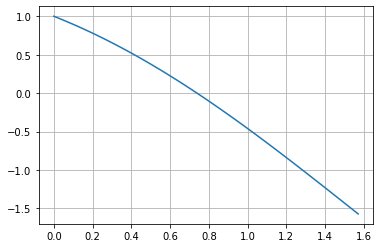

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(0,np.pi/2,100)
y=np.cos(x)-x
plt.plot(x,y)
plt.grid()

- **Solución (continuación)**: 
  - Como se ve en el gráfico, la raíz parece encontrarse cerca a 0.7, así que usaremos ese como nuesto valor de partida $p_0 = 0.7$. 

  - Para usar el método es necesario conocer la derivada de la función:

   $$
   f'(x) = - \sin x - 1 
   $$

  - La primera aproximación $p_1$ de la raíz se puede calcular y es igual a:

   $$
   p_1 = p_{0}-\frac{f\left(p_{0}\right)}{f'\left(p_{0}\right)} = p_{0}-\frac{\cos p_0 - p_0}{- \sin p_0 - 1 } = 0.7394364978
   $$

  - Uno de los criterios para verificar que tan cerca estamos de la solución es evaluar la función en el nuevo valor estimado de $p$:

   $$
   f(p_1) = \cos p_1 - p_1 = -0.000588
   $$
   que es un valor realmente pequeño.  En tan solo un paso ya el método de Newton nos entrega una aproximación muy razonable de la raíz.

  - Si repetimos el procedimiento obtenemos una segunda aproximación:

   $$
   p_2 = p_{1}-\frac{\cos p_1 - p_1}{- \sin p_1 - 1 } = 0.73908516
   $$

  - Una aproximación que tiene un valor de función $f(p_2)= -0.0000000456$.

### Algoritmo del método de Newton

- En la imagen a continuación se muestra el algoritmo del método de Newton:

  <center>
  <img src="https://raw.githubusercontent.com/JorgeZuluaga/NotasMetodosNumericos/master/figuras/algoritmo-metodo-newton.png" width=600>
  </center>

- Una implementación en Python del método se muestra a continuación:

In [13]:
def metodo_newton_burden(f,fp,p0,TOL,N0):
  #Paso 1
  i=1
  #Paso 2
  while i<=N0:
      #Paso 3
      p = p0 - f(p0)/fp(p0)
      #Paso 4
      if abs(p-p0)<TOL:
        return i,p
      #Paso 5
      i = i + 1
      #Paso 6
      p0 = p
  print(f"El método fallo después de {N0} iteraciones con un último valor p = {p}")

- Nótese que hemos agregado al algoritmo original la funcionalidad de devolver no solo la raíz, sino también el número de iteraciones que fueron necesarias para conseguir la tolerancia solicitada.

- Aplicado a la función anterior daría:

In [15]:
def f(x):
  fx=np.cos(x)-x
  return fx

def fp(x):
  fpx=-np.sin(x)-1
  return fpx

metodo_newton_burden(f,fp,0.7,1e-5,100)

(3, 0.7390851332151608)

- Nótese que para usar el método de Newton es necesario proveer no solamente la función `f` sino también su derivada `fp`.

## Expresiones simbólicas en Python

- Hasta ahora hemos aprendido como usar Python como una herramienta de cálculo numérico, de manipulación de números, casi como lo hace una calculadora.

- Pero existe una herramienta en Python para manipular fórmulas, expresiones abstractas o simbólicas.  Esa herramienta es la biblioteca de algoritmos simbólicos, `SymPy`.

- Para manipular símbolos en Python usando `SymPy` lo primero que debe hacerse es crear variables que no contengan números, sino símbolos:

In [16]:
import sympy as sp

x=sp.symbols("x")

- Ahora la variable `x` puede ser usada para construir expresiones algebraicas en lugar de para calcular numéricamente cosas.  Por ejemplo se puede construir un polinomio:

In [17]:
x**2+2*x+1

x**2 + 2*x + 1

- A esto se lo llama una *expresión* y es importante entender que no representa una variable convencional de Python con la que podemos hacer operaciones numéricas tradicionales.

- Las expresiones pueden almacenarse en variables:

In [18]:
p=x**2+2*x+1

- Y estas nuevas *variables* operarse para obtener nuevas expresiones:

In [19]:
p**2

(x**2 + 2*x + 1)**2

- El poder de `SymPy` está en la capacidad de convertir expresiones simbólicas en otras expresiones más desarrolladas.  Por ejemplo, la expresión anterior se puede desarrollar rompiendo los paréntesis:

In [20]:
sp.expand(p**2)

x**4 + 4*x**3 + 6*x**2 + 4*x + 1

- O el polinomio original se puede factorizar:

In [21]:
sp.factor(p)

(x + 1)**2

### Cálculo con SymPy

- Es posible realizar derivadas e integrales en SymPy facilitando en muchas ocasiones la solución a problemas complejos.

- Por ejemplo, para encontrar la derivada de la función $f(x)=\cos x - x$ se usa el siguiente código:

In [22]:
sp.diff(sp.cos(x)-x,x)

-sin(x) - 1

- Nótese el uso de la función `sp.cos` que es la versión simbólica de la función numérica `np.cos`. Por casi cada función numérica de NumPy existe una contraparte simbólica.

- La versatilidad de `SymPy` se pone a prueba para hacer operaciones laboriosas, como obtener la derivada cuarta de la función anterior:

In [23]:
f=sp.cos(x)-x
sp.diff(f,x,4)

cos(x)

- Igualmente se pueden hacer integrales como esta:

  $$
  \int x e^x dx
  $$

In [25]:
f=x*sp.exp(x)
sp.integrate(f,x)

(x - 1)*exp(x)

- O integrales definidas como esta:

  $$
  \int_0^{\pi/4} \frac{dx}{\sqrt{1-x^2}}
  $$

In [29]:
f=1/sp.sqrt(1-x**2)
sp.integrate(f,(x,0,sp.pi/4))

asin(pi/4)

- En el último caso puede ser necesario tener el valor numérico del resultado.  Para ello se usa la función `sp.N` así:

In [30]:
f=1/sp.sqrt(1-x**2)
I=sp.integrate(f,(x,0,sp.pi/4))
sp.N(I)

0.903339110766513

### Conversión de funciones simbólicas en funciones numéricas

- En ocasiones puede ser interesante para nosotros convertir el resultado de una operación muy complicada, en una función numérica.

- Un ejemplo muy obvio se da justamente con el método de Newton, en el que para realizar el procedimiento se necesita una derivada.

- Siempre que se tiene una expresión se puede obtener una versión numérica usando la función `sp.lambdify`:

In [34]:
expresion=x**2+2*x+1
funcion=sp.lambdify(x,expresion)

- La función ahora puede usarse como una función numérica convencional:

In [35]:
funcion(1)

4

- Aplicando este truco podemos implementar el método de Newton para funciones complicadas usando un procedimiento similar al ejemplo a continuación:

  $$
  f(x)=e^x + 2^{-x} + 2 \cos x - 6 
  $$

In [41]:
x=sp.symbols("x")
#La función
f_simbolica=sp.exp(x)+2**(-x)+2*sp.cos(x)-6
#Su derivada
fp_simbolica=sp.diff(f_simbolica,x)

fp_simbolica

exp(x) - 2*sin(x) - 2**(-x)*log(2)

- Ahora convertimos estas expresiones simbólicas en funciones:

In [42]:
f=sp.lambdify(x,f_simbolica)
fp=sp.lambdify(x,fp_simbolica)

- Utilizamos estas funciones con la rutina de Newton:

In [43]:
metodo_newton_burden(f,fp,1.5,1e-5,100)

(5, 1.829383601933849)

## Método de la secante

- En algunas situaciones puede ser muy difícil, incluso imposible obtener una expresión matemática para la derivada.  En ese caso se puede usar una fórmula aproximada para la derivada.

- Sabemos que si tenemos dos valores muy próximos $p_{n-1}$ y $p_{n-2}$ de una variable, la derivada de la función en $p_{n-1}$ se puede aproximar como:

  $$
  f^{\prime}\left(p_{n-1}\right) \approx \frac{f\left(p_{n-2}\right)-f\left(p_{n-1}\right)}{p_{n-2}-p_{n-1}}
  $$

- Usando este hecho, la fórmula de recurrencia del método de Newton-Raphson:

  $$
  p_n = p_{n-1}-\frac{f\left(p_{n-1}\right)}{f'\left(p_{n-1}\right)}
  $$
  se puede escribir, reemplazando $f'\left(p_{n-1}\right)$ como:

  $$
  p_{n}=p_{n-1}-\frac{f\left(p_{n-1}\right)\left(p_{n-1}-p_{n-2}\right)}{f\left(p_{n-1}\right)-f\left(p_{n-2}\right)}
  $$

- Aunque esta sea una expresión mucho más elaborada, solo necesita la función y no la derivada.

- A la aplicación de esta fórmula se lo conoce como el **método de la secante**.

- Una característica peculiar del método de la secante es que para comenzar a usarlo necesitamos dos valores iniciales, $p_0$ y $p_1$ en lugar de un solo valor.

### Algoritmos del método de la secante

- El método de la secante es casi idéntico al método de Newton cambiando solamente la fórmula de recurrencia:

In [50]:
def metodo_secante_burden(f,p0,p1,TOL,N0):
  #Paso 1
  i=2
  q0=f(p0)
  q1=f(p1)
  #Paso 2
  while i<=N0:
      #Paso 3
      p = p1 - q1*(p1-p0)/(q1-q0)
      #Paso 4
      if abs(p-p0)<TOL:
        return i,p
      #Paso 5
      i = i + 1
      #Paso 6
      p0=p1
      q0=q1
      p1=p
      q1=f(p) 

  print(f"El método fallo después de {N0} iteraciones con un último valor p = {p}")

- Ahora podemos aplicar este algoritmo al problema que teníamos antes:

In [56]:
def f(x):
  fx=np.cos(x)-x
  return fx

metodo_secante_burden(f,0.7,0.8,1e-5,100)

(5, 0.7390851332151595)


## Continuará...

## Ejercicios

-----
*Fin*